In [2]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import pandas as pd

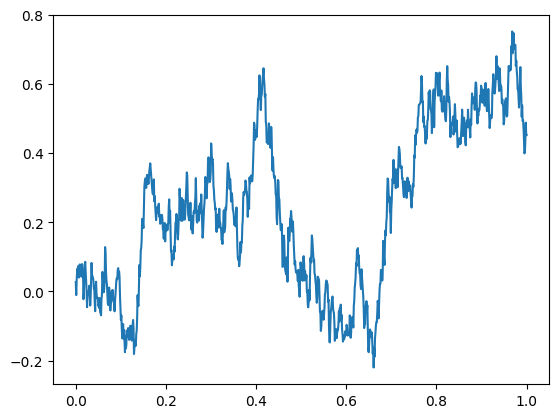

In [10]:
#1 (a)
n = 1000
def generate_1():
    global n
    x = np.linspace(0,1,n)
    sigma = x[1]-x[0]
    W = scipy.stats.norm.rvs(loc=0,scale=np.sqrt(sigma),size=n)
    return np.cumsum(W)
x = np.linspace(0,1,n)
plt.plot(x,generate_1())
plt.show()

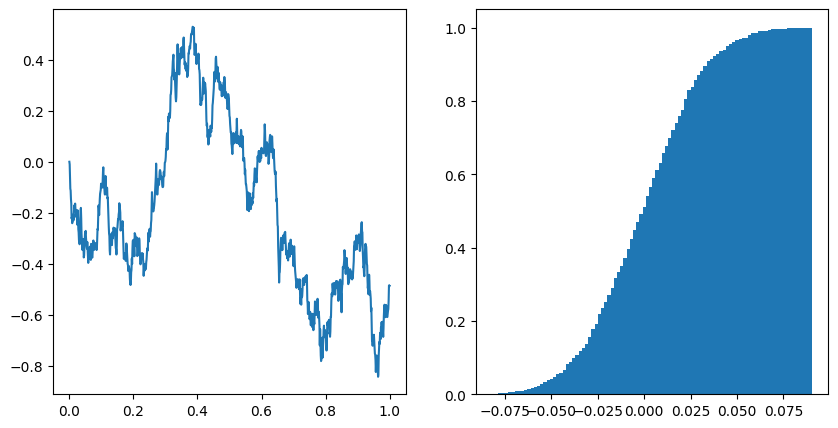

приращения не нормальны


In [36]:
#1 (b)
n = 1000

def generate(t):
    global n
    xi = scipy.stats.norm.rvs(size=n)
    W = scipy.stats.norm.rvs()*t
    for i in range(1,n+1):
       W += np.sqrt(2) * xi[i-1] * np.sin(np.pi * i * t)/(np.pi*i)
    return W
    
x = np.linspace(0,1,n+1)
fig,ax=plt.subplots(1,2,figsize=(10,5))
W = generate_2(x)
ax[0].plot(x,W)

#ЭФР
diff = np.zeros(n)
for i in range(n):
    diff[i] = W[i+1]-W[i]
ax[1].hist(diff,cumulative=True,density=True,bins=100)
plt.show()

#проверка на нормальность
F = scipy.stats.norm(loc=0,scale=np.sqrt(x[1]-x[0]))
p = scipy.stats.kstest(diff,F.cdf).pvalue
if p < 0.05:
    print('приращения не нормальны')
else:
    print('приращения нормальны')

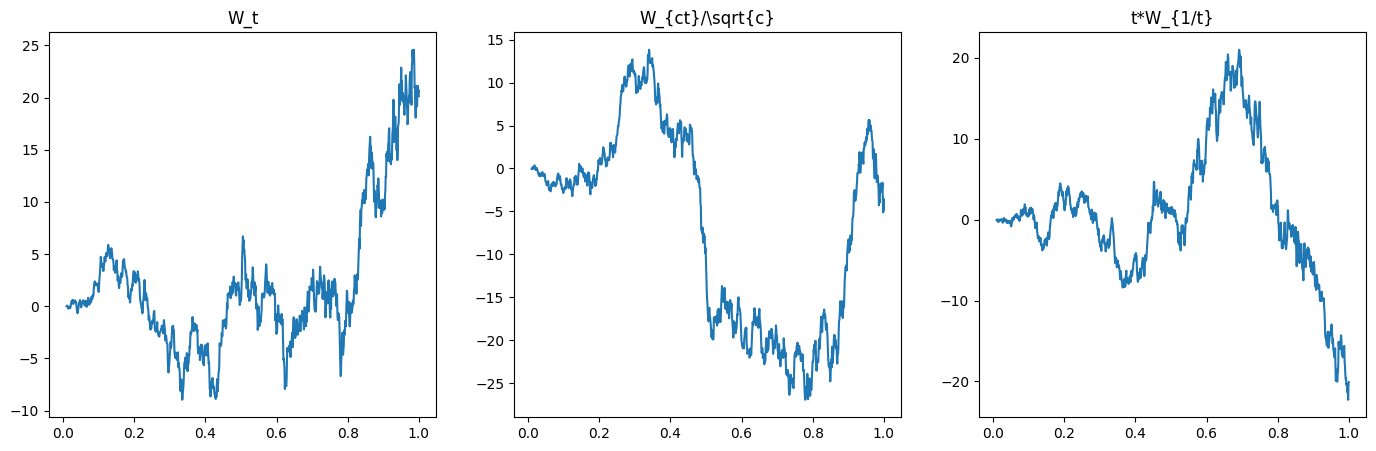

In [5]:
#2
def generate_2(t):
    return scipy.stats.norm.rvs(loc=0,scale=np.sqrt(t))

def generate_3(t): #W_{ct}/\sqrt{c}
    global c
    return generate_2(t*c)/np.sqrt(c)

def generate_4(t): #tW_{1/t
    return t * generate_2(1/t)

#параметры
c = 5
n = 1000
x = np.linspace(0.01,1,1000)

#вывод
fig,ax = plt.subplots(1,3,figsize=(17,5))
ax[0].plot(x,np.cumsum(generate_2(x)))
ax[0].set_title('W_t')
ax[1].plot(x,np.cumsum(generate_3(x)))
ax[1].set_title('W_{ct}/\sqrt{c}')
ax[2].plot(x,np.cumsum(generate_4(x)))
ax[2].set_title('t*W_{1/t}')
plt.show()

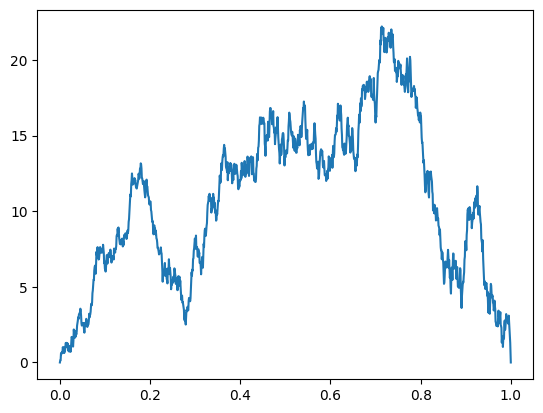

In [6]:
#3 iii экскурсия
def W(t):
    return scipy.stats.norm.rvs(loc=0,scale=np.sqrt(t))

n = 10000
x = np.linspace(0.001,10,n)
W = np.cumsum(W(x))
j_left = 0
for i in range(n-1):
    if W[i]*W[i+1] < 0 and x[i] < 1:
        T_left = (x[i]*W[i+1]-x[i+1]*W[i])/(W[i+1]-W[i])
        j_left = i
    if W[i]*W[i+1] < 0 and x[i] > 1:
        T_right = (x[i]*W[i+1]-x[i+1]*W[i])/(W[i+1]-W[i])
        j_right = i
        break
y = (np.array([x[i] for i in range(j_left,j_right)]+[T_right])-T_left)*(1/(T_right-T_left))
W = np.array([0]+[W[i] for i in range(j_left+1,j_right)]+[0])/np.sqrt(c)
plt.plot(y,W)
plt.show()

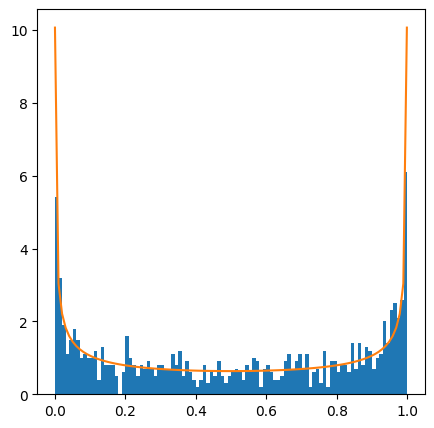

In [79]:
#4 iii выше нуля (a)
#параметры
n = 1000
N = 1000
fig,ax = plt.subplots(1,1,figsize=(5,5))
x = np.linspace(0.001,0.999,100) #плотность арксинуса
y = 1/(np.pi * np.sqrt(x*(1-x)))


T = np.zeros(N)
for i in range(N):
    t = 0
    X = scipy.stats.norm.rvs(size=n)
    S = np.cumsum(X)
    S = np.insert(S,0,0)
    for j in range(n):
        if S[j] >= 0:
            T[i] += 1
ax.hist(T/n,bins=100,density=True)
ax.plot(x,y)
plt.show()

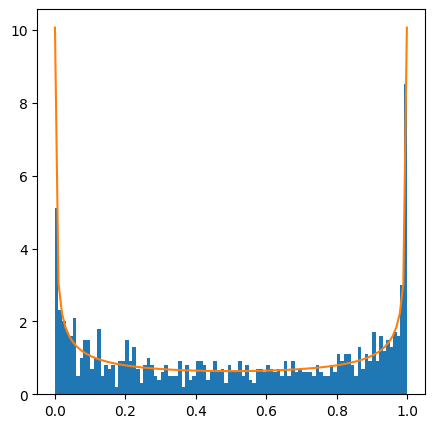

In [81]:
#4 iii выше нуля (b)
#параметры
n = 1000
N = 1000
fig,ax = plt.subplots(1,1,figsize=(5,5))
x = np.linspace(0.001,0.999,100) #плотность арксинуса
y = 1/(np.pi * np.sqrt(x*(1-x)))


T = np.zeros(N)
for i in range(N):
    t = 0
    X = scipy.stats.bernoulli.rvs(p=1/2,size=n)*2-1
    S = np.cumsum(X)
    S = np.insert(S,0,0)
    for j in range(n):
        if S[j] >= 0:
            T[i] += 1
ax.hist(T/n,bins=100,density=True)
ax.plot(x,y)
plt.show()